# Taylor Swift's Lyrics

## Objetivos

- Objetivo 1;

- Objetivo 2;

- Objetivo 3.

## 1. Pré-processamento de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gdata.csv')

In [3]:
df

,class,lyric
0,1,and as you he'd prettiest is No Don't gotta I ...
1,1,"fell my call it the know of other you love, li..."
2,1,You I walked oh he should've me Even you this ...
3,1,"of Given your I (What us to gorgeous, so I'm j..."
4,1,be when were stranger have cleanin' thing like...
...,...,...
2395,0,No matter how hard I try \r\nYou keep pushing...
2396,0,Me-he-he-helanie \r\nWhat can the problem be ...
2397,0,Chances are you'll find me \r\nSomewhere on y...
2398,0,Though this is all you'll ever get \r\nIt wou...


In [4]:
import re

In [5]:
word_regex = r'[^a-zA-Z]'
break_regex = r'[\r\n]'

df['lyric'] = (
    df['lyric']
    .apply(lambda x: re.sub(word_regex, ' ', x))
    .apply(lambda x: re.sub(break_regex, ' ', x))
)

In [6]:
df

,class,lyric
0,1,and as you he d prettiest is No Don t gotta I ...
1,1,fell my call it the know of other you love li...
2,1,You I walked oh he should ve me Even you this ...
3,1,of Given your I What us to gorgeous so I m j...
4,1,be when were stranger have cleanin thing like...
...,...,...
2395,0,No matter how hard I try You keep pushing m...
2396,0,Me he he helanie What can the problem be ...
2397,0,Chances are you ll find me Somewhere on you...
2398,0,Though this is all you ll ever get It would...


In [7]:
df['lyric'] = df['lyric'].apply(lambda x: x.lower())
df

,class,lyric
0,1,and as you he d prettiest is no don t gotta i ...
1,1,fell my call it the know of other you love li...
2,1,you i walked oh he should ve me even you this ...
3,1,of given your i what us to gorgeous so i m j...
4,1,be when were stranger have cleanin thing like...
...,...,...
2395,0,no matter how hard i try you keep pushing m...
2396,0,me he he helanie what can the problem be ...
2397,0,chances are you ll find me somewhere on you...
2398,0,though this is all you ll ever get it would...


In [8]:
import spacy

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
tokens_list = []
for lyric in df['lyric']:
    doc = nlp(lyric)
    tokens = [token.lemma_ for token in doc 
              if not token.is_stop and not token.is_punct]
    tokens_list.append(tokens)

df['tokens'] = tokens_list

In [11]:
df

,class,lyric,tokens
0,1,and as you he d prettiest is no don t gotta i ...,"[d, prettiest, don, t, get, to, want, m, , h..."
1,1,fell my call it the know of other you love li...,"[fall, know, love, , like, bad, love, , stra..."
2,1,you i walked oh he should ve me even you this ...,"[walk, oh, ve, worth, long, oh, , , oh, , ..."
3,1,of given your i what us to gorgeous so i m j...,"[give, , gorgeous, , m, jealous, , die, ain..."
4,1,be when were stranger have cleanin thing like...,"[strange, cleanin, , thing, like, think, midd..."
...,...,...,...
2395,0,no matter how hard i try you keep pushing m...,"[matter, hard, try, , push, aside, , t, ..."
2396,0,me he he helanie what can the problem be ...,"[helanie, , problem, , sweet, helanie, ..."
2397,0,chances are you ll find me somewhere on you...,"[chance, ll, find, , road, tonight, , en..."
2398,0,though this is all you ll ever get it would...,"[ll, , strange, delight, , eye, nose, mi..."


In [12]:
df['lyricsProcessed'] = df['tokens'].apply(lambda x: ' '.join(x))

In [13]:
df

,class,lyric,tokens,lyricsProcessed
0,1,and as you he d prettiest is no don t gotta i ...,"[d, prettiest, don, t, get, to, want, m, , h...",d prettiest don t get to want m home know s...
1,1,fell my call it the know of other you love li...,"[fall, know, love, , like, bad, love, , stra...",fall know love like bad love stranger dest...
2,1,you i walked oh he should ve me even you this ...,"[walk, oh, ve, worth, long, oh, , , oh, , ...",walk oh ve worth long oh oh t say go d ...
3,1,of given your i what us to gorgeous so i m j...,"[give, , gorgeous, , m, jealous, , die, ain...",give gorgeous m jealous die ain t s look...
4,1,be when were stranger have cleanin thing like...,"[strange, cleanin, , thing, like, think, midd...",strange cleanin thing like think middle tire...
...,...,...,...,...
2395,0,no matter how hard i try you keep pushing m...,"[matter, hard, try, , push, aside, , t, ...",matter hard try push aside t break ...
2396,0,me he he helanie what can the problem be ...,"[helanie, , problem, , sweet, helanie, ...",helanie problem sweet helanie win ...
2397,0,chances are you ll find me somewhere on you...,"[chance, ll, find, , road, tonight, , en...",chance ll find road tonight end drive ...
2398,0,though this is all you ll ever get it would...,"[ll, , strange, delight, , eye, nose, mi...",ll strange delight eye nose mind g...


## 2. Análise exploratória

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [15]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['lyricsProcessed'])

In [16]:
import plotly.express as px

In [17]:
bow_df = pd.DataFrame(X_bow.toarray(), columns = bow_vectorizer.get_feature_names_out())

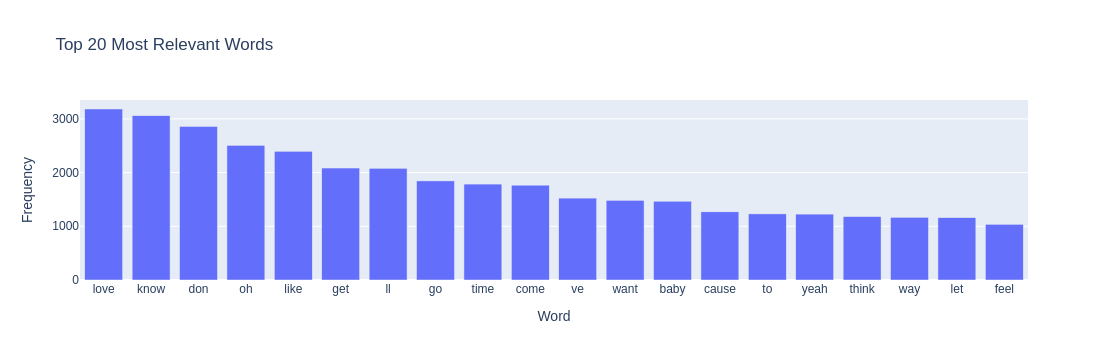

In [18]:
word_freq = bow_df.sum().sort_values(ascending=False)

word_freq_df = word_freq.reset_index()
word_freq_df.columns = ['word', 'freq']

bar_word_freq = px.bar(
    word_freq_df.head(20),  # Mostrar apenas top 20 para melhor visualização
    x='word',
    y='freq',
    title='Top 20 Most Relevant Words',
    labels={'word': 'Word', 'freq': 'Frequency'}
)

bar_word_freq.show()


In [19]:
labels = df['class']

In [20]:
bow_df['category'] = labels

not_bow = bow_df[bow_df['category'] == 0].drop('category', axis=1)
yes_bow = bow_df[bow_df['category'] == 1].drop('category', axis=1)

In [21]:
top_not_words = not_bow.sum().sort_values(ascending = False).head(20)
top_yes_words = yes_bow.sum().sort_values(ascending = False).head(20)

In [22]:
max_value = max(top_not_words.max(), top_yes_words.max()) * 1.10

fig_ham = px.bar(
    x = top_not_words.index,
    y = top_not_words.values,
    title = 'Top 10 Most Frequent Words - Not Taylor',
    labels = {'x': 'Word', 'y': 'BoW'},
    color_discrete_sequence = ['green']
)

fig_ham.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_spam = px.bar(
    x = top_yes_words.index,
    y = top_yes_words.values,
    title = 'Top 10 Most Frequent Words - Taylor',
    labels = {'x': 'Word', 'y': 'BoW'},
    color_discrete_sequence = ['red']
)

fig_spam.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_ham.show()
fig_spam.show()

In [23]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['lyricsProcessed'])

In [24]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = bow_vectorizer.get_feature_names_out())

In [25]:
word_relevance = tfidf_df.sum().sort_values(ascending=False)

word_relevance_df = word_relevance.reset_index()
word_relevance_df.columns = ['word', 'relevance']

bar_word_relevance = px.bar(
    word_relevance_df.head(20),
    x='word',
    y='relevance',
    title='Top 20 Most Relevant Words (TF-IDF)',
    labels={'word': 'Word', 'relevance': 'Relevance'}
)

bar_word_relevance.show()

In [26]:
tfidf_df['category'] = labels

not_tfidf = tfidf_df[tfidf_df['category'] == 0].drop('category', axis=1)
yes_tfidf = tfidf_df[tfidf_df['category'] == 1].drop('category', axis=1)

In [27]:
top_relevant_not_words = not_tfidf.sum().sort_values(ascending = False).head(20)
top_relevant_yes_words = yes_tfidf.sum().sort_values(ascending = False).head(20)

In [28]:
max_value = max(top_relevant_not_words.max(), top_relevant_yes_words.max()) * 1.10

fig_ham = px.bar(
    x = top_relevant_not_words.index,
    y = top_relevant_not_words.values,
    title = 'Top 10 Most Relevant Words - Not Taylor',
    labels = {'x': 'Word', 'y': 'TF-IDF'},
    color_discrete_sequence=['green']
)

fig_ham.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

# Gráfico para SPAM
fig_spam = px.bar(
    x = top_relevant_yes_words.index,
    y = top_relevant_yes_words.values,
    title = 'Top 10 Most Relevant Words - Taylor',
    labels = {'x': 'Word', 'y': 'TF-IDF'},
    color_discrete_sequence = ['red']
)

fig_spam.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_ham.show()
fig_spam.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['class'], test_size=0.2, random_state=42, stratify=df['class']
)

# Classifiers to test
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'classifier': clf, 'accuracy': accuracy}
    print(f"{name}: {accuracy:.4f}")

# Find best classifier
best_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest: {best_name} ({results[best_name]['accuracy']:.4f})")

Random Forest: 0.8771
SVM: 0.8854
Naive Bayes: 0.8104
Logistic Regression: 0.8750

Best: SVM (0.8854)


In [31]:
import joblib

best_clf = results[best_name]['classifier']
joblib.dump(best_clf, f"{best_name.replace(' ', '_').lower()}_model.pkl")


joblib.dump(tfidf_vectorizer, "vectorizer.pkl")

['vectorizer.pkl']